# Importing data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/mars/RudolphineTables.csv", index_col = "index")
df

,ANOMALIA COEQUATA,INTERVALLU
index,,
0,0.0.0,166465
1,0.54.41,166462
2,1.49.22,166456
3,2.44.3,166446
4,3.38.44,166431
...,...,...
176,175.36.39,138269
177,176.42.29,138254
178,177.48.19,138244


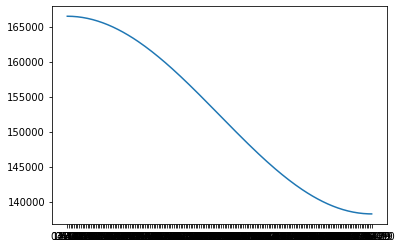

In [3]:
import matplotlib.pyplot as plt
plt.plot(df["ANOMALIA COEQUATA"].values, df["INTERVALLU"].values)

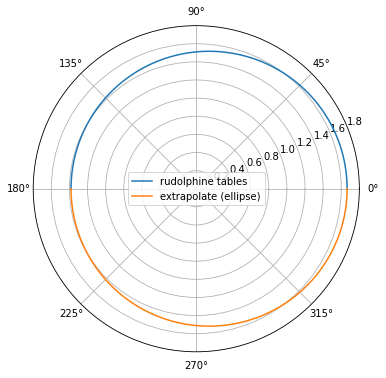

In [4]:
def dsm_to_deg(s):
  value0 = s.find(".")
  value1 = s[value0+1:].find(".")
  return float(s[:value0]) + float(s[value0+1:value0+value1+1])/60 + float(s[value0+value1+2:])/3600

longitudinal_data = np.asarray(list(map(dsm_to_deg,df["ANOMALIA COEQUATA"].values)))/360*2*np.pi
radius_data = df["INTERVALLU"].values/100000

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='polar')
c = ax.plot(longitudinal_data, radius_data, label = "rudolphine tables")
c = ax.plot(longitudinal_data*-1, radius_data, label = "extrapolate (ellipse)")
ax.set_ylim(0,1.8)
plt.legend()

In [5]:
# what value of eccentricity does the data suggest?
from scipy.optimize import curve_fit
import numpy as np

def ecc(theta, p, e): #try to fit p and e
  return p/(1+e*np.cos(theta))

values,cov = curve_fit(ecc, longitudinal_data, radius_data, p0 = [150000, 0.1]) # requires good initialisation points
print(values)

#from https://nssdc.gsfc.nasa.gov/planetary/factsheet/marsfact.html
#recognised orbit eccentricitty is 0.0935 
#recognised semimajor axis is 1.5266 
#note that the value of eccentricity we get is negative because of the setup of the ellipse

[ 1.51042379 -0.09264712]


In [6]:
# average percentage error in fitting the eccentricity and semimajor axis
# the loss in using this formula to fit the data is 
result = ecc(longitudinal_data, values[0], values[1])
pcterror = (np.abs(result - radius_data)/radius_data)
print(np.mean(pcterror))

5.13333352231232e-06


In [7]:
rmin = values[0]/(1+values[1])
rmax = values[0]/(1-values[1])
semimajoraxis = values[0]/(1-values[1]**2)
semiminoraxis = values[0]/np.sqrt(1-values[1]**2)

print(rmin, rmax, semimajoraxis,semiminoraxis)

1.664648705111805 1.3823527850094552 1.5235007450606302 1.51694817761639


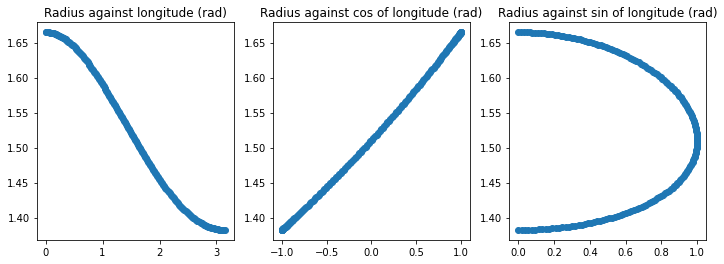

In [8]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,4))
ax1.scatter(longitudinal_data, radius_data)
ax1.set_title("Radius against longitude (rad)")
ax2.scatter(np.cos(longitudinal_data), radius_data)
ax2.set_title("Radius against cos of longitude (rad)")
ax3.scatter(np.sin(longitudinal_data), radius_data)
ax3.set_title("Radius against sin of longitude (rad)")
plt.show()

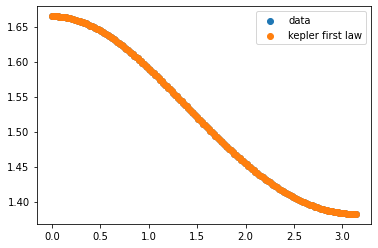

In [9]:
plt.scatter(longitudinal_data, radius_data, label = "data")
plt.scatter(longitudinal_data, ecc(longitudinal_data, values[0], values[1]), label = "kepler first law")
plt.legend()
plt.show()
# this shows that kepler's first law doesnt fit well

# Importing AI Feynman

In [10]:
!git clone https://github.com/zykhoo/AI-Feynman.git 

Cloning into 'AI-Feynman'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 78 (delta 5), reused 0 (delta 0), pack-reused 64
Unpacking objects: 100% (78/78), 14.32 MiB | 1.69 MiB/s, done.


In [11]:
import matplotlib.pyplot as plt
!pip install matplotlib-label-lines
from labellines import labelLine, labelLines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!nvidia-smi

!lsb_release -a

!python3 --version

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal
Python 3.9.16


Look at what we downloaded

In [13]:
!ls /content/AI-Feynman
# %pycat AI-Feynman/requirements.txt if you need to fix the dependencies

aifeynman     examples	MANIFEST.in  requirements.txt  setup.py
example_data  LICENSE	README.md    setup.cfg


Fix broken requirements file (may not be needed if later versions fix this).

In [14]:
%%writefile AI-Feynman/requirements.txt
torch>=1.4.0
matplotlib
sympy==1.4
pandas
scipy
sortedcontainers

Overwriting AI-Feynman/requirements.txt


Install dependencies not already installed in Google Collab

In [15]:
!pip install -r AI-Feynman/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 62.3 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1


Check that fortran is installed

In [16]:
!gfortran --version

GNU Fortran (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Check the OS version

In [17]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


Install the csh shell

In [18]:
!sudo apt-get install csh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  csh
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 243 kB of archives.
After this operation, 367 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 csh amd64 20110502-5 [243 kB]
Fetched 243 kB in 0s (2,685 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package csh.
(Reading database ... 128275 files and directories currently installed

Set loose permissions to avoid some reported file permissions issues

In [19]:
!chmod +777 /content/AI-Feynman/aifeynman/*

Compile the fortran code

Look at the code directory

In [20]:
!ls -l /content/AI-Feynman/aifeynman

total 1304
-rwxrwxrwx 1 root root     11 Mar 15 10:49 10ops.txt
-rwxrwxrwx 1 root root     15 Mar 15 10:49 14ops.txt
-rwxrwxrwx 1 root root     19 Mar 15 10:49 19ops.txt
-rwxrwxrwx 1 root root      8 Mar 15 10:49 7ops.txt
-rwxrwxrwx 1 root root 960508 Mar 15 10:49 arity2templates.txt
-rwxrwxrwx 1 root root   4297 Mar 15 10:49 dimensionalAnalysis.py
-rwxrwxrwx 1 root root    952 Mar 15 10:49 get_demos.py
-rwxrwxrwx 1 root root   6168 Mar 15 10:49 get_pareto.py
-rwxrwxrwx 1 root root   1745 Mar 15 10:49 getPowers.py
-rwxrwxrwx 1 root root    247 Mar 15 10:49 __init__.py
-rwxrwxrwx 1 root root    155 Mar 15 10:49 resources.py
-rwxrwxrwx 1 root root   2395 Mar 15 10:49 RPN_to_eq.py
-rwxrwxrwx 1 root root   5205 Mar 15 10:49 RPN_to_pytorch.py
-rwxrwxrwx 1 root root   5383 Mar 15 10:49 S_add_bf_on_numbers_on_pareto.py
-rwxrwxrwx 1 root root   7908 Mar 15 10:49 S_add_snap_expr_on_pareto.py
-rwxrwxrwx 1 root root    990 Mar 15 10:49 S_add_sym_on_pareto.py
-rwxrwxrwx 1 root root   1540 Mar 15 1

Compile .f files into .x files

In [21]:
import os
os.chdir("/content/AI-Feynman/") #&& ./compile.sh
!ls
!python3 /content/AI-Feynman/setup.py install


Streaming output truncated to the last 5000 lines.
aifeynman/symbolic_regress2.f90:197:1:

  197 |    arity = arities(i)
      | 1
aifeynman/symbolic_regress2.f90:198:1:

  198 |    op = ops(i:i)
      | 1
aifeynman/symbolic_regress2.f90:199:1:

  199 |    if (arity.eq.0) then ! This is a nonary function
      | 1
aifeynman/symbolic_regress2.f90:200:1:

  200 |      if (op.eq."0") then
      | 1
aifeynman/symbolic_regress2.f90:202:1:

  202 |      else if (op.eq."1") then
      | 1
aifeynman/symbolic_regress2.f90:203:1:

  203 |        y = 1.
      | 1
aifeynman/symbolic_regress2.f90:204:1:

  204 |      else if (op.eq."P") then
      | 1
aifeynman/symbolic_regress2.f90:205:2:

  205 |         y = 4.*atan(1.) ! pi
      |  1
aifeynman/symbolic_regress2.f90:207:5:

  207 |            y = x(ichar(op)-96)
      |     1
aifeynman/symbolic_regress2.f90:208:1:

  208 |      end if
      | 1
aifeynman/symbolic_regress2.f90:209:1:

  209 |    else if (arity.eq.1) then ! This is a unary functio

# Creating the dataset for AI Feynman and running AI Feynman

## Attempt 2 with modified dataset, only include x_0 = cos(longi), x1 = sin(longi) to try and recover equation form


In [22]:
data_sincos = pd.DataFrame()
data_sincos['longi'] = longitudinal_data
data_sincos['radius'] = radius_data
data_sincos['cos_longi'] = np.cos(data_sincos['longi'])
data_sincos['sin_longi'] = np.sin(data_sincos['longi'])
data_sincos = data_sincos.sample(frac=1).reset_index(drop=True)

np.savetxt('/content/AI-Feynman/example_data/data_cossin1.txt', data_sincos[[ "cos_longi", "sin_longi", "radius"]].sample(frac=1).values)
np.loadtxt('/content/AI-Feynman/example_data/data_cossin1.txt')

array([[ 9.99873491e-01,  1.59060661e-02,  1.66462000e+00],
       [ 3.90476738e-01,  9.20612794e-01,  1.56711000e+00],
       [ 1.09922245e-01,  9.93940189e-01,  1.52596000e+00],
       [ 3.11109571e-01,  9.50374050e-01,  1.55526000e+00],
       [ 2.30169208e-02,  9.99735076e-01,  1.51366000e+00],
       [-1.87786091e-01,  9.82209949e-01,  1.48461000e+00],
       [ 7.17292435e-01,  6.96772246e-01,  1.61794000e+00],
       [-8.23395442e-02,  9.96604334e-01,  1.49900000e+00],
       [-8.88236692e-01,  4.59386088e-01,  1.39558000e+00],
       [ 9.33540460e-01,  3.58472048e-01,  1.65343000e+00],
       [ 2.94874300e-01,  9.55536052e-01,  1.55285000e+00],
       [-7.62398591e-01,  6.47107710e-01,  1.41078000e+00],
       [ 9.54548625e-01,  2.98055234e-01,  1.65695000e+00],
       [ 9.44534106e-01,  3.28413341e-01,  1.65527000e+00],
       [-1.70252496e-01,  9.85400471e-01,  1.48697000e+00],
       [-2.57540376e-01,  9.66267538e-01,  1.47523000e+00],
       [-2.92112061e-01,  9.56384098e-01

In [23]:
import os
os.chdir("/content/AI-Feynman/")
print(os.getcwd())

/content/AI-Feynman


In [24]:
! rm -r /content/AI-Feynman/results

rm: cannot remove '/content/AI-Feynman/results': No such file or directory


In [25]:
from aifeynman.S_run_aifeynman import run_aifeynman
import time

start = time.time()
run_aifeynman("/content/AI-Feynman/example_data/","data_cossin1.txt",30,"7ops.txt", polyfit_deg=1, NN_epochs=400)
end = time.time()

Checking for brute force + 

/content/AI-Feynman/example_data/ data_cossin1.txt_train
Trying to solve mysteries with brute force...
Trying to solve /content/AI-Feynman/example_data/data_cossin1.txt_train
1A added  47.10970674092926 26.06855071345074 1.518570000000+0
1A added  47.10970674092926 26.06855071345074 2.518570000000+(-(0+1))
1A added  57.51017052177871 25.575643426476066 0.501102344689+sqrt(sqrt((x0+1)))
1A added  57.30772812271998 23.800197285768434 0.108874258195+sqrt((sqrt((x0+1))+1))
1A added  57.539600443927704 23.222024526574714 0.340952959979+sqrt(sqrt(((x0+1)+1)))
1A added  59.78637315652765 23.210735173156696 -0.033141365422+sqrt((sqrt(((x0+1)+1))+1))
1A added  59.78637315652766 23.210735173156696 -1.033141365422+(sqrt((sqrt(((x0+1)+1))+1))+1)
1A added  62.524077992559086 21.563496489426505 2.698433554875+(-sqrt(sqrt((((-x0)+1)+1))))
1A added  62.524077992559086 21.563496489426505 1.698433554875+((-sqrt(sqrt((((-x0)+1)+1))))+1)
1A added  62.524077992559086 21.5634964

In [26]:
print(end - start)

1451.2124609947205


In [27]:
!cat /content/AI-Feynman/results/solution_data_cossin1.txt

26.194248195657387 4.710711646018068 852.6388079292703 3.0 26.185779490265933 1.50000000000000
26.181361239416493 4.709451282975008 852.4106822184765 6.266786540694901 26.16291313546752 1.42857142857143
25.995303914345307 4.699610289631769 850.6294624233502 7.339850002884624 25.98505647919591 log(x0 + 5)
24.053187020830926 4.5881314373627795 830.4517901626631 11.562242424221072 24.052774887808187 0.142857142857143*x0 + 1.5
23.511822651846412 4.5553081740342956 824.5107795002075 12.076815597050832 23.511719933705418 1.5*exp(0.1*x0)
22.868219932306168 4.51360713163035 816.9628908250933 54.50878211627672 22.841842637810792 1/(0.666666666666667 - 0.0556244812357114*x0)
22.496974221367662 4.489089714149268 812.5252382610174 56.18023559638666 22.45694406073391 1.5119670200057298*exp(0.1*x0)
21.2333894354156 4.397136384188773 795.8816855381679 58.909819094866386 21.070262521654925 x0/(x1 + 6) + 1.510965630582
20.754502765442904 4.375901317621388 792.0381384894712 94.94259199007062 20.76240004

Equation 3: np.log(x0 + 5)
Equation 4: 0.142857142857143*x0 + 1.5
Equation 5: 1.5*np.exp(0.1*x0)
Equation 6: 1/(0.666666666666667 - 0.0556244812357114*x0)
Equation 7: 1.5119670200057298*np.exp(0.1*x0)
Equation 8: x0/(x1 + 6) + 1.510965630582
Equation 9: 1.51366746425629*np.exp(0.0931480601429939*x0)
Equation 10: 1/(0.662428796291351 - 0.0612906403839588*x0)
Equation 11: (0.662428796291351 - 0.0612906403839588*x0)**(-1.00133872032166)


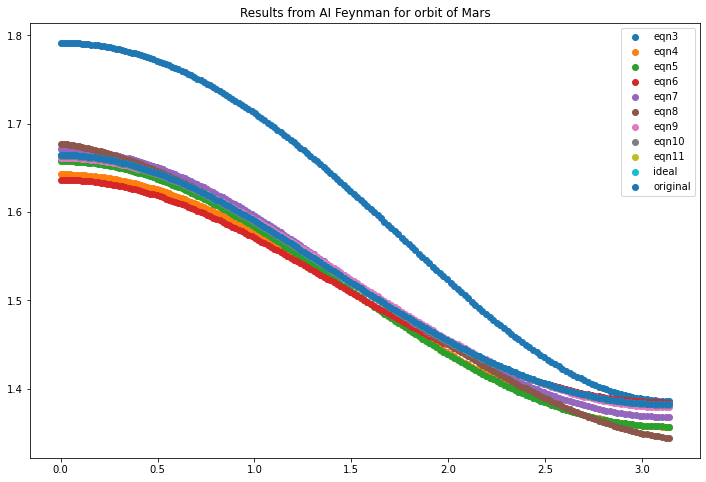

In [28]:
plt.figure(figsize = (12,8))

def replace_equations(input_string):
  input_string = input_string.replace("exp", "np.exp")
  input_string = input_string.replace("sqrt", "np.sqrt")
  input_string = input_string.replace("pi", "np.pi")
  input_string = input_string.replace("log", "np.log")
  input_string = input_string.replace("sin", "np.sin")
  input_string = input_string.replace("anp.sin", "np.arcsin")
  input_string = input_string.replace("cos", "np.cos")
  input_string = input_string.replace("anp.cos", "np.arccos")
  input_string = input_string.replace("tan", "np.tan")
  input_string = input_string.replace("anp.tan", "np.arctan")
  return input_string
  
with open("/content/AI-Feynman/results/solution_data_cossin1.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    equation = replace_equations(equation.replace("\n", ""))
    if ("x0" in equation)|("x1" in equation)|("x2" in equation):
      print("Equation %s: %s" %(count, equation))
      equation = equation.replace("x0","data_sincos['cos_longi'].values")
      equation = equation.replace("x1","data_sincos['sin_longi'].values")
      equation = equation.replace("x2","data_sincos['1cos_longi'].values")
      equation = equation.replace("x3","data_sincos['1sin_longi'].values")
      try: 
            output = list(eval(equation))
            plt.scatter(data_sincos['longi'],
                    output, label = "eqn%s" %count)
      except Exception as e:
        None
    else: 
      continue

plt.scatter(longitudinal_data, ecc(longitudinal_data, values[0], values[1]), label = "ideal")      
plt.scatter(data_sincos['longi'],data_sincos['radius'], label = "original")

# labelLines(plt.gca().get_lines(),zorder=2.5)
plt.legend()
plt.title("Results from AI Feynman for orbit of Mars")
plt.show()

1 & $1.50000000000000$ & 0.0106 & 26.186
2 & $1.42857142857143$ & 0.019 & 26.182
3 & $log(x_0 + 5)$ & 0.0092 & 26.006
4 & $0.142857142857143\times x_0 + 1.5$ & 0.000309 & 24.053
5 & $1.5\times exp(0.1\times x_0)$ & 0.00021 & 23.512
6 & $1/(0.666666666666667 - 0.0556244812357114\times x_0)$ & 0.000269 & 22.857
7 & $1.5119670200057298\times exp(0.1\times x_0)$ & 5.88e-05 & 22.457
8 & $x_0/(x_1 + 6) + 1.510965630582$ & 0.000179 & 21.07
9 & $1.51366746425629\times exp(0.0931480601429939\times x_0)$ & 5.39e-06 & 20.762
10 & $1/(0.662428796291351 - 0.0612906403839588\times x_0)$ & 7.78e-07 & 19.781
11 & $(0.662428796291351 - 0.0612906403839588\times x_0)^(-1.00133872032166)$ & 6.01e-10 & 12.211


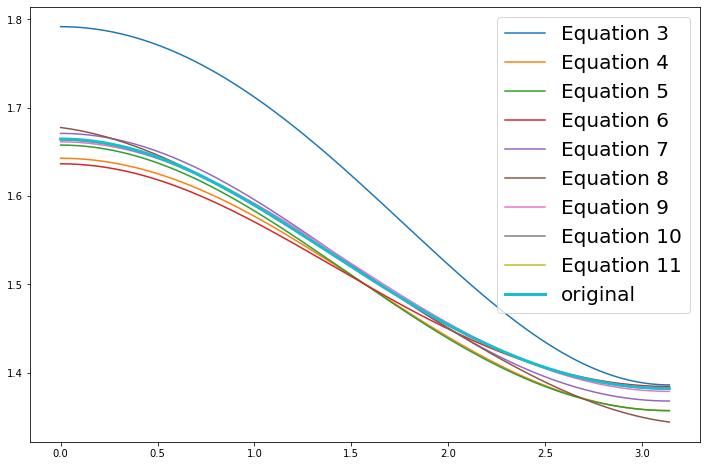

In [29]:
from aifeynman.S_get_symbolic_expr_error import get_symbolic_expr_error
import re

plt.figure(figsize = (12,8))

def replace_equations(input_string):
  input_string = input_string.replace("exp", "np.exp")
  input_string = input_string.replace("sqrt", "np.sqrt")
  input_string = input_string.replace("pi", "np.pi")
  input_string = input_string.replace("log", "np.log")
  input_string = input_string.replace("sin", "np.sin")
  input_string = input_string.replace("anp.sin", "np.arcsin")
  input_string = input_string.replace("cos", "np.cos")
  input_string = input_string.replace("anp.cos", "np.arccos")
  input_string = input_string.replace("tan", "np.tan")
  input_string = input_string.replace("anp.tan", "np.arctan")
  return input_string
  
def pretty_print_eqn(s):
  return s.replace("\n", "").replace("x0", "x_0").replace("x1", "x_1").replace("**", "^").replace("*", "\\times ")

with open("/content/AI-Feynman/results/solution_data_cossin1.txt", "r") as file:
  data = file.readlines()
  count=0
  for j in data:
    count+=1
    equation = j.split(' ',5)[-1]
    eq = replace_equations(equation.replace("\n", ""))
    if ("x0" in eq) & ("np.pi" not in eq) or ("x1" in eq) or ("x2" in eq):
      eq = eq.replace("x0","np.cos(longitudinal_data)")
      eq = eq.replace("x1","np.sin(longitudinal_data)")
      eq = eq.replace("x2","data_sincos['1cos_longi'].values")
      eq = eq.replace("x3","data_sincos['1sin_longi'].values")
      try: 
            output = list(eval(eq))
            plt.plot(longitudinal_data,
                    output, label = "Equation %s" %count)
            print("%s & $%s$ & %.3g & %.5g" %(count, pretty_print_eqn(equation), np.mean((np.asarray(output)-radius_data)**2), 
                                              get_symbolic_expr_error(np.loadtxt("/content/AI-Feynman/example_data/data_cossin1.txt"),str(equation.replace("\n", "")))))
      except Exception as e:
        print(e)
    else: 
      try: 
            output = [float(eval(eq))]*len(radius_data)
            # plt.plot(data_original['longi'],
            #         output, label = "eqn%s" %count)
            print("%s & $%s$ & %.3g & %.5g" %(count, pretty_print_eqn(equation), np.mean((np.asarray(output)-radius_data)**2), 
                                              get_symbolic_expr_error(np.loadtxt("/content/AI-Feynman/example_data/data_cossin1.txt"),str(equation.replace("\n", "")))))
      except Exception as e:
        print(e)
      continue

plt.plot(longitudinal_data, radius_data, label = "original", linewidth=3)   
# labelLines(plt.gca().get_lines(),zorder=2.5)
plt.legend(fontsize=20)
# plt.title("Results from AI Feynman for orbit of Mars")
# plt.xlabel("longitude")
# plt.ylabel("radius")
plt.show()